# Aptitude question classifier

Given a  Aptitude question, It should be known that which category the question belongs to.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import  metrics
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
import scikitplot as skplt


The steps involved in achieving the classification are:

1. Dataset  contains of 3876 questions of which filtered questions are  1108.

In [2]:
sampleData = pd.read_csv('/home/manisha/Downloads/Dataset.csv',sep='\t')
sampleData

Topic                                           Question
0                 Interest  Find the SI for a sum of Rs.1200 at 5% pa for ...
1                 Interest  If Rs.4000 becomes Rs.4560 in 2 years time, wh...
2                 Interest  What principal would amount to Rs.8880 in 4 yr...
3                 Interest  What sum would amount to Rs.26620 in 3 years a...
4                 Interest  If a certain sum doubles itself in 3 yrs under...
5                 Interest  How many will Rs.10000 approximately amount to...
6                 Interest  A invested Rs.14000 under SI at 8% pa. Find th...
7        Time and Distance  A man rides his bicycle for 45 min to cover a ...
8                 Interest  A sum invested at SI amounts to Rs.6192 at the...
9        Time and Distance                           Express 60 kmph in m/sec
10                Interest  A took a loan for 7 yrs at 9% pa SI. At the en...
11       Time and Distance  A man leaves P and reaches Q in 3 hrs at an av...
12                Interest  Ram borrowed Rs.60000 from 2 persons under SI....
13       Time and Distance  A train of length 300 m travels at a speed of ...
14       Time and Distance  A train of length 300 m takes 20 sec to cross ...
15                Interest  The difference between the SI and CI on a cert...
16       Time and Distance  In a 100 m race, ' A ' beats ' B ' by 10 m. Wh...
17                Interest  The difference between SI at 7% pa and CI at 9...
18       Time and Distance  In a 1500 m race, Tinu beats Minu by 100 m. In...
19                Interest  What is the present worth of Rs.5324 due in 3 ...
20       Time and Distance  A train travelled a distance of 200 km in 5 hr...
21                Interest  If in 4 years, Rs.2520 amounts to Rs.3024, in ...
22       Time and Distance  A train takes 20 sec to cross a lamp post and ...
23                Interest  A deposits Rs.50000 in PNB for 2.5 years. If t...
24       Time and Distance  A train travelling at 72 kmph crosses a man wa...
25                Interest  Vivek makes a deposit of Rs.10000 in a bank fo...
26       Time and Distance  A bus takes 2.5 hrs more to cover a distance o...
27                Interest  What will be the SI on Rs.700 at 9% pa for the...
28       Time and Distance  Mr. Khan takes 18 hours to go by train to a ce...
29                Interest  Ajay borrows Rs.1500 from two people. He pays ...
...                    ...                                                ...
1078           Probability  What is the probability of getting tail, head,...
1079           Probability  What is the probability of getting at least on...
1080           Probability  What is the probability of getting tails, tail...
1081           Probability  A box contains 10 balls out of which 3 are col...
1082           Probability  If the probability of getting heads in an unfa...
1083           Probability  To qualify for the world cup, a run rate of 25...
1084           Probability  What is the probability of getting a queen or ...
1085           Probability  Find the chance of drawing 2 White balls in su...
1086           Probability  What is the probability that a digit selected ...
1087           Probability  There are 100 lottery tickets in a lottery in ...
1088           Probability  Six boys and two girls are to be seated in a r...
1089           Probability  A ticket is drawn from hundred tickets numbere...
1090           Probability  From a well shuffled pack of 52 cards, three c...
1091           Probability  Two dice are thrown. Find the probability that...
1092         Profit & Loss  If a dealer charges $200 for a chair, he gains...
1093         Profit & Loss  Successive discounts of 10% and 15% is equival...
1094         Profit & Loss  If the cost price of 10 pens be equal to selli...
1095         Profit & Loss  A man sold a television at a loss of 6%. Had h...
1096         Profit & Loss  A trader allows two successive discounts 15% a...
1097         Profit & Loss  A vendor buys a

In [3]:
sampleQuestions = sampleData["Question"]
sampleTopics = sampleData["Topic"]

The categories present in  dataset are :

In [4]:
topicsList = set(sampleData["Topic"].values)
print(topicsList, len(topicsList))

{'Ratios & Proportions', 'Ages', 'Interest', 'Averages', 'Time and Distance', 'Partnerships', 'Time and Work', 'Permutations & Combinations', 'Probability', 'Profit & Loss'} 10


Divided the data into train and test sets.Train data consists of 60% of data,Test data consists of 20% data

In [5]:
trainQuestions, testQuestions, trainTopics, testTopics = train_test_split(sampleQuestions, sampleTopics, test_size = 0.4)

CountVectorizer helps us convert the data into vector form and it assigns the value of the  words in alphabetical order.
It also takes parameter to filter unwanted features.

In [6]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
dicOfQues = vectorizer.fit(trainQuestions)
print(dicOfQues.vocabulary_)

{'sum': 1335, 'money': 935, 'rs': 1184, '13': 36, '380': 146, 'years': 1505, '20': 77, '070': 1, 'compound': 487, 'man': 890, 'covers': 526, 'half': 734, 'journey': 809, 'bus': 414, '60': 205, 'kmph': 836, 'remaining': 1145, 'scooter': 1213, '30': 121, 'rest': 1159, 'cycle': 536, '10': 2, 'average': 361, 'speed': 1293, 'travel': 1406, 'entire': 640, 'probability': 1083, 'getting': 709, 'tails': 1348, 'heads': 740, 'order': 989, 'successive': 1331, 'tosses': 1393, 'fair': 657, 'coin': 472, 'train': 1402, 'travelled': 1407, 'distance': 586, '200': 78, 'km': 835, 'hrs': 758, '50': 182, 'time': 1386, 'did': 571, 'thrice': 1380, 'good': 720, 'workman': 1497, 'able': 287, 'finish': 676, 'job': 802, 'days': 544, 'number': 965, 'finishing': 678, 'work': 1492, 'flask': 682, 'contains': 507, '80l': 248, 'milk': 923, '8l': 262, 'removed': 1147, 'replaced': 1152, 'water': 1468, 'solution': 1284, 'concentration': 492, 'resultant': 1161, 'mixture': 931, 'children': 448, 'age': 301, '12': 25, 'child'

In [8]:
encodedTrainQuestions = vectorizer.transform(trainQuestions)
print(encodedTrainQuestions.shape)
print(type(encodedTrainQuestions))
print(encodedTrainQuestions.toarray())

(664, 1531)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [9]:
encodedTestQuestions = vectorizer.transform(testQuestions)

In [10]:
#fit
dicOfQues = vectorizer.fit(trainQuestions)

#transform training data
encodedTrainQuestions= vectorizer.transform(trainQuestions)

# equivalently: combine fit and transform into a single step
# this is faster
vectorizedTrainQuestions = vectorizer.fit_transform(trainQuestions)

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). 

In [11]:
mnb = MultinomialNB()

fit method in MultinomialNaiveBayes:

Parameters:	
X : shape = [n_samples, n_features]

Training vectors, where n_samples is the number of samples and n_features is the number of features.

y :  shape = [n_samples]

Target values.

In [12]:
mnb.fit(vectorizedTrainQuestions, trainTopics)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
predictTestdata = mnb.predict(encodedTestQuestions)


In [14]:
predictProbas = mnb.predict_proba(encodedTestQuestions)

Precision and Recall for Multinomial Naive Bayes.

In [18]:
plt.rcParams["figure.figsize"] = (10,10)

In [23]:
skplt.metrics.plot_precision_recall_curve(testTopics, predictProbas)

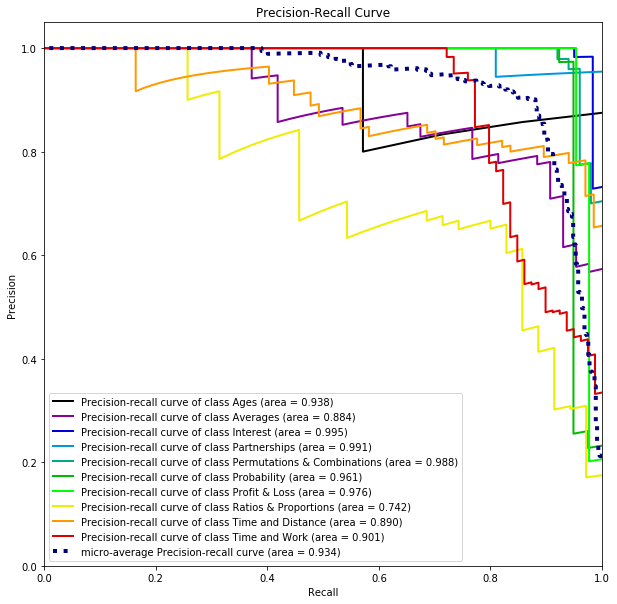

In [24]:
plt.show()

In [25]:
print("Classification report for classifier %s:\n%s\n"
      % (mnb, metrics.classification_report(testTopics, predictTestdata)))

Classification report for classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True):
                             precision    recall  f1-score   support

                       Ages       0.88      1.00      0.93         7
                   Averages       0.74      0.91      0.81        43
                   Interest       0.98      0.95      0.97        60
               Partnerships       0.84      1.00      0.91        21
Permutations & Combinations       0.98      0.94      0.96        50
                Probability       0.97      0.95      0.96        39
              Profit & Loss       1.00      0.95      0.98        43
       Ratios & Proportions       0.76      0.46      0.57        35
          Time and Distance       0.78      0.97      0.87        67
              Time and Work       0.88      0.77      0.82        79

                avg / total       0.89      0.88      0.88       444




In [26]:
print(accuracy_score(testTopics, predictTestdata))

0.880630630631


In [27]:
testVsPredict = [(x , y) for x,y in zip(testTopics,predictTestdata)]
print(testVsPredict)

[('Time and Work', 'Time and Work'), ('Permutations & Combinations', 'Permutations & Combinations'), ('Interest', 'Interest'), ('Averages', 'Averages'), ('Interest', 'Interest'), ('Partnerships', 'Partnerships'), ('Permutations & Combinations', 'Permutations & Combinations'), ('Probability', 'Probability'), ('Interest', 'Interest'), ('Time and Distance', 'Time and Distance'), ('Time and Distance', 'Time and Distance'), ('Profit & Loss', 'Profit & Loss'), ('Partnerships', 'Partnerships'), ('Permutations & Combinations', 'Permutations & Combinations'), ('Permutations & Combinations', 'Averages'), ('Profit & Loss', 'Profit & Loss'), ('Averages', 'Ratios & Proportions'), ('Interest', 'Interest'), ('Profit & Loss', 'Profit & Loss'), ('Averages', 'Averages'), ('Probability', 'Probability'), ('Time and Distance', 'Time and Distance'), ('Averages', 'Averages'), ('Time and Distance', 'Time and Distance'), ('Permutations & Combinations', 'Permutations & Combinations'), ('Permutations & Combinati

In [28]:
actualCount = Counter(testTopics)
fliteredPrediction = [t[0] for t in testVsPredict if t[0]==t[1]]
predictedCount = Counter(fliteredPrediction)
print(actualCount)
print(predictedCount)

Counter({'Time and Work': 79, 'Time and Distance': 67, 'Interest': 60, 'Permutations & Combinations': 50, 'Averages': 43, 'Profit & Loss': 43, 'Probability': 39, 'Ratios & Proportions': 35, 'Partnerships': 21, 'Ages': 7})
Counter({'Time and Distance': 65, 'Time and Work': 61, 'Interest': 57, 'Permutations & Combinations': 47, 'Profit & Loss': 41, 'Averages': 39, 'Probability': 37, 'Partnerships': 21, 'Ratios & Proportions': 16, 'Ages': 7})


In [29]:
filteredDataSets = set(actualCount) & set(predictedCount)
actualVsReal = [(element,actualCount[element],predictedCount[element]) for element in filteredDataSets]
actualVsReal

[('Ratios & Proportions', 35, 16),
 ('Ages', 7, 7),
 ('Interest', 60, 57),
 ('Averages', 43, 39),
 ('Time and Distance', 67, 65),
 ('Partnerships', 21, 21),
 ('Time and Work', 79, 61),
 ('Profit & Loss', 43, 41),
 ('Probability', 39, 37),
 ('Permutations & Combinations', 50, 47)]

In [30]:
d = defaultdict(list)
for ratio in range(1,8):
    trainQuestions, testQuestions, trainTopics, testTopics = train_test_split(sampleQuestions, sampleTopics, test_size = ratio/10)
    vectorizedTrainQuestions = vectorizer.fit_transform(trainQuestions)
    encodedTestQuestions = vectorizer.transform(testQuestions)
    mnb = MultinomialNB()
    mnb.fit(vectorizedTrainQuestions, trainTopics)
    predictTestdata = mnb.predict(encodedTestQuestions)
    out = [(x , y) for x,y in zip(testTopics,predictTestdata)]
    actualCount = Counter(testTopics)
    fliteredPrediction = [t[0] for t in out if t[0]==t[1]]
    predictedCount = Counter(fliteredPrediction)
    filteredDataSets = set(actualCount) & set(predictedCount)
    for i in filteredDataSets:
        d[i].append((actualCount[i],predictedCount[i]))
    data = sorted([(v,k) for v,k in d.items()])
print(tabulate(data))

---------------------------  --------------------------------------------------------------------------
Ages                         [(2, 2), (7, 6), (9, 7), (6, 5), (6, 6), (17, 2), (15, 10)]
Averages                     [(10, 10), (22, 19), (34, 30), (49, 35), (57, 40), (67, 57), (78, 58)]
Interest                     [(16, 16), (33, 33), (48, 46), (68, 66), (73, 73), (104, 101), (111, 110)]
Partnerships                 [(10, 10), (9, 9), (14, 14), (22, 22), (38, 37), (37, 37), (49, 48)]
Permutations & Combinations  [(14, 13), (19, 15), (40, 36), (54, 50), (58, 52), (76, 72), (89, 82)]
Probability                  [(12, 12), (15, 15), (35, 33), (40, 39), (53, 52), (58, 57), (70, 67)]
Profit & Loss                [(9, 9), (18, 17), (28, 27), (34, 33), (49, 47), (50, 48), (65, 62)]
Ratios & Proportions         [(9, 3), (20, 8), (25, 14), (41, 16), (53, 23), (59, 26), (64, 29)]
Time and Distance            [(15, 15), (40, 40), (49, 48), (63, 62), (78, 77), (84, 84), (104, 96)]
Time and 